In [1]:
import tensorflow as tf
from vit import ViTClassfier
from utils import plot_grid_ds, AttrDict, BalancedSparseCategoricalAccuracy

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [13]:
# !kaggle datasets download -d andrewmvd/lung-and-colon-cancer-histopathological-images

100%|██████████████████████████████████████| 1.76G/1.76G [02:08<00:00, 21.9MB/s]
100%|██████████████████████████████████████| 1.76G/1.76G [02:08<00:00, 14.7MB/s]


In [14]:
# !unzip lung-and-colon-cancer-histopathological-images.zip

Archive:  lung-and-colon-cancer-histopathological-images.zip
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca10.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca100.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1000.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1001.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1002.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1003.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1004.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1005.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1006.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1007.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colo

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1093.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1094.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1095.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1096.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1097.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1098.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1099.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca11.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca110.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1100.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1101.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1102.jpeg  
  inflating: lung_colon_image_set/colon_ima

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1189.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca119.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1190.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1191.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1192.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1193.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1194.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1195.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1196.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1197.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1198.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1199.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1284.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1285.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1286.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1287.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1288.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1289.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca129.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1290.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1291.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1292.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1293.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1294.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1377.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1378.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1379.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca138.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1380.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1381.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1382.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1383.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1384.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1385.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1386.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1387.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1473.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1474.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1475.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1476.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1477.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1478.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1479.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca148.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1480.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1481.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1482.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1483.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca157.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1570.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1571.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1572.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1573.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1574.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1575.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1576.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1577.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1578.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1579.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca158.jpeg  
  inflating: lung_colon_image_set/colon_im

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1662.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1663.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1664.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1665.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1666.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1667.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1668.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1669.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca167.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1670.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1671.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1672.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1754.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1755.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1756.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1757.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1758.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1759.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca176.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1760.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1761.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1762.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1763.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1764.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1847.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1848.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1849.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca185.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1850.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1851.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1852.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1853.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1854.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1855.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1856.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1857.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1946.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1947.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1948.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1949.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca195.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1950.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1951.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1952.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1953.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1954.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1955.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca1956.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2039.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca204.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2040.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2041.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2042.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2043.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2044.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2045.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2046.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2047.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2048.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2049.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2133.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2134.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2135.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2136.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2137.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2138.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2139.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca214.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2140.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2141.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2142.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2143.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2230.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2231.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2232.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2233.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2234.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2235.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2236.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2237.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2238.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2239.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca224.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2240.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2323.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2324.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2325.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2326.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2327.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2328.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2329.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca233.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2330.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2331.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2332.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2333.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca242.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2420.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2421.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2422.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2423.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2424.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2425.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2426.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2427.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2428.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2429.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca243.jpeg  
  inflating: lung_colon_image_set/colon_im

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2512.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2513.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2514.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2515.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2516.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2517.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2518.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2519.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca252.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2520.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2521.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2522.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2610.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2611.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2612.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2613.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2614.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2615.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2616.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2617.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2618.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2619.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca262.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2620.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2709.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca271.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2710.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2711.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2712.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2713.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2714.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2715.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2716.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2717.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2718.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2719.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2805.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2806.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2807.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2808.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2809.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca281.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2810.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2811.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2812.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2813.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2814.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2815.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca29.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca290.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2900.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2901.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2902.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2903.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2904.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2905.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2906.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2907.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2908.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2909.jpeg  
  inflating: lung_colon_image_set/colon_ima

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2993.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2994.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2995.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2996.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2997.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2998.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca2999.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca30.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca300.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3000.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3001.jpeg  
  inflating: lung_colon_image_set/colon_image_

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3086.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3087.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3088.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3089.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca309.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3090.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3091.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3092.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3093.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3094.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3095.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3096.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3181.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3182.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3183.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3184.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3185.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3186.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3187.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3188.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3189.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca319.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3190.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3191.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3277.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3278.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3279.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca328.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3280.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3281.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3282.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3283.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3284.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3285.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3286.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3287.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3370.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3371.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3372.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3373.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3374.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3375.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3376.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3377.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3378.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3379.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca338.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3380.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3465.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3466.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3467.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3468.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3469.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca347.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3470.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3471.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3472.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3473.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3474.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3475.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3561.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3562.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3563.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3564.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3565.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3566.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3567.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3568.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3569.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca357.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3570.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3571.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3658.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3659.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca366.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3660.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3661.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3662.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3663.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3664.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3665.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3666.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3667.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3668.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3751.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3752.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3753.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3754.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3755.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3756.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3757.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3758.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3759.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca376.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3760.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3761.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3848.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3849.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca385.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3850.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3851.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3852.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3853.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3854.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3855.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3856.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3857.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3858.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3943.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3944.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3945.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3946.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3947.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3948.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3949.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca395.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3950.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3951.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3952.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca3953.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4041.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4042.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4043.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4044.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4045.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4046.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4047.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4048.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4049.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca405.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4050.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4051.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4135.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4136.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4137.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4138.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4139.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca414.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4140.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4141.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4142.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4143.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4144.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4145.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4228.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4229.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca423.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4230.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4231.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4232.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4233.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4234.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4235.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4236.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4237.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4238.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4325.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4326.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4327.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4328.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4329.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca433.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4330.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4331.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4332.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4333.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4334.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4335.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4417.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4418.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4419.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca442.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4420.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4421.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4422.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4423.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4424.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4425.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4426.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4427.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4512.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4513.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4514.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4515.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4516.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4517.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4518.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4519.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca452.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4520.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4521.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4522.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4604.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4605.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4606.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4607.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4608.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4609.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca461.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4610.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4611.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4612.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4613.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4614.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4699.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca47.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca470.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4700.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4701.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4702.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4703.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4704.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4705.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4706.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4707.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4708.jpeg  
  inflating: lung_colon_image_set/colon_ima

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4794.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4795.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4796.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4797.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4798.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4799.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca48.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca480.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4800.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4801.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4802.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4803.jpeg  
  inflating: lung_colon_image_set/colon_ima

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4888.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4889.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca489.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4890.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4891.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4892.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4893.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4894.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4895.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4896.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4897.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4898.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4984.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4985.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4986.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4987.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4988.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4989.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca499.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4990.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4991.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4992.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4993.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca4994.jpeg  
  inflating: lung_colon_image_set/colon_i

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca585.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca586.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca587.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca588.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca589.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca59.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca590.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca591.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca592.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca593.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca594.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca595.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/co

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca681.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca682.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca683.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca684.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca685.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca686.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca687.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca688.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca689.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca69.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca690.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca691.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/co

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca778.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca779.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca78.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca780.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca781.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca782.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca783.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca784.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca785.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca786.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca787.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca788.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/co

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca872.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca873.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca874.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca875.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca876.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca877.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca878.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca879.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca88.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca880.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca881.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca882.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/co

  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca972.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca973.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca974.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca975.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca976.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca977.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca978.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca979.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca98.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca980.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca981.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_aca/colonca982.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/co

  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1069.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn107.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1070.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1071.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1072.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1073.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1074.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1075.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1076.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1077.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1078.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1079.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn108.jpeg  
 

  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1164.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1165.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1166.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1167.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1168.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1169.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn117.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1170.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1171.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1172.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1173.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1174.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1175.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1265.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1266.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1267.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1268.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1269.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn127.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1270.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1271.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1272.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1273.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1274.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1275.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1276.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1363.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1364.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1365.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1366.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1367.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1368.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1369.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn137.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1370.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1371.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1372.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1373.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1374.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1462.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1463.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1464.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1465.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1466.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1467.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1468.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1469.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn147.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1470.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1471.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1472.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1473.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1562.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1563.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1564.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1565.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1566.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1567.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1568.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1569.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn157.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1570.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1571.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1572.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1573.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn166.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1660.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1661.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1662.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1663.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1664.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1665.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1666.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1667.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1668.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1669.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn167.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1670.jpeg  
 

  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1757.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1758.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1759.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn176.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1760.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1761.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1762.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1763.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1764.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1765.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1766.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1767.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1768.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1855.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1856.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1857.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1858.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1859.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn186.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1860.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1861.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1862.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1863.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1864.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1865.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1866.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1952.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1953.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1954.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1955.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1956.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1957.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1958.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1959.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn196.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1960.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1961.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1962.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn1963.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2048.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2049.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn205.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2050.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2051.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2052.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2053.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2054.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2055.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2056.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2057.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2058.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2059.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2143.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2144.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2145.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2146.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2147.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2148.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2149.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn215.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2150.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2151.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2152.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2153.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2154.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2242.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2243.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2244.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2245.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2246.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2247.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2248.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2249.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn225.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2250.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2251.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2252.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2253.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2339.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn234.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2340.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2341.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2342.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2343.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2344.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2345.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2346.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2347.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2348.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2349.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn235.jpeg  
 

  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2436.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2437.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2438.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2439.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn244.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2440.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2441.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2442.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2443.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2444.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2445.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2446.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2447.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2535.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2536.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2537.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2538.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2539.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn254.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2540.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2541.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2542.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2543.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2544.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2545.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2546.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2631.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2632.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2633.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2634.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2635.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2636.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2637.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2638.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2639.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn264.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2640.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2641.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2642.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2728.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2729.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn273.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2730.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2731.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2732.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2733.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2734.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2735.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2736.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2737.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2738.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2739.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2828.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2829.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn283.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2830.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2831.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2832.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2833.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2834.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2835.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2836.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2837.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2838.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2839.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2925.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2926.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2927.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2928.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2929.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn293.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2930.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2931.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2932.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2933.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2934.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2935.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn2936.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn302.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3020.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3021.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3022.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3023.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3024.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3025.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3026.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3027.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3028.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3029.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn303.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3030.jpeg  
 

  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn312.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3120.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3121.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3122.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3123.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3124.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3125.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3126.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3127.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3128.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3129.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn313.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3130.jpeg  
 

  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3217.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3218.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3219.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn322.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3220.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3221.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3222.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3223.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3224.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3225.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3226.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3227.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3228.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3314.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3315.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3316.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3317.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3318.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3319.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn332.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3320.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3321.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3322.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3323.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3324.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3325.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3415.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3416.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3417.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3418.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3419.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn342.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3420.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3421.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3422.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3423.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3424.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3425.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3426.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3514.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3515.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3516.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3517.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3518.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3519.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn352.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3520.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3521.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3522.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3523.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3524.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3525.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3616.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3617.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3618.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3619.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn362.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3620.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3621.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3622.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3623.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3624.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3625.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3626.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3627.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3713.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3714.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3715.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3716.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3717.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3718.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3719.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn372.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3720.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3721.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3722.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3723.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3724.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3809.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn381.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3810.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3811.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3812.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3813.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3814.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3815.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3816.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3817.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3818.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3819.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn382.jpeg  
 

  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3905.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3906.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3907.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3908.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3909.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn391.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3910.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3911.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3912.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3913.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3914.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3915.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn3916.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4003.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4004.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4005.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4006.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4007.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4008.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4009.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn401.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4010.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4011.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4012.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4013.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4014.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn410.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4100.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4101.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4102.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4103.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4104.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4105.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4106.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4107.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4108.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4109.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn411.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4110.jpeg  
 

  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4197.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4198.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4199.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn42.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn420.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4200.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4201.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4202.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4203.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4204.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4205.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4206.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4207.jpeg  
  

  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4296.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4297.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4298.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4299.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn43.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn430.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4300.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4301.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4302.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4303.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4304.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4305.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4306.jpeg  
  

  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4392.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4393.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4394.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4395.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4396.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4397.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4398.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4399.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn44.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn440.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4400.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4401.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4402.jpeg  
  

  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4489.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn449.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4490.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4491.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4492.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4493.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4494.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4495.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4496.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4497.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4498.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4499.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn45.jpeg  
  

  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4586.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4587.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4588.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4589.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn459.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4590.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4591.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4592.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4593.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4594.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4595.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4596.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4597.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4683.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4684.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4685.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4686.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4687.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4688.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4689.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn469.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4690.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4691.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4692.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4693.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4694.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4781.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4782.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4783.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4784.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4785.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4786.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4787.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4788.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4789.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn479.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4790.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4791.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4792.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4881.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4882.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4883.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4884.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4885.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4886.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4887.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4888.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4889.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn489.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4890.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4891.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4892.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4984.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4985.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4986.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4987.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4988.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4989.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn499.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4990.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4991.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4992.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4993.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4994.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn4995.jpeg  


  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn587.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn588.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn589.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn59.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn590.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn591.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn592.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn593.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn594.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn595.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn596.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn597.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn598.jpeg  
  inflating: 

  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn687.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn688.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn689.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn69.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn690.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn691.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn692.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn693.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn694.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn695.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn696.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn697.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn698.jpeg  
  inflating: 

  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn788.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn789.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn79.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn790.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn791.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn792.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn793.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn794.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn795.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn796.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn797.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn798.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn799.jpeg  
  inflating: 

  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn888.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn889.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn89.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn890.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn891.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn892.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn893.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn894.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn895.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn896.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn897.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn898.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn899.jpeg  
  inflating: 

  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn986.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn987.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn988.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn989.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn99.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn990.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn991.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn992.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn993.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn994.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn995.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn996.jpeg  
  inflating: lung_colon_image_set/colon_image_sets/colon_n/colonn997.jpeg  
  inflating: 

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1085.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1086.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1087.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1088.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1089.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca109.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1090.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1091.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1092.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1093.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1094.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1095.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1184.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1185.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1186.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1187.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1188.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1189.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca119.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1190.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1191.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1192.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1193.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1194.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1284.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1285.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1286.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1287.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1288.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1289.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca129.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1290.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1291.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1292.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1293.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1294.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1380.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1381.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1382.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1383.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1384.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1385.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1386.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1387.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1388.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1389.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca139.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1390.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1476.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1477.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1478.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1479.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca148.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1480.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1481.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1482.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1483.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1484.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1485.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1486.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1571.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1572.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1573.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1574.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1575.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1576.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1577.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1578.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1579.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca158.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1580.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1581.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1669.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca167.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1670.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1671.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1672.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1673.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1674.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1675.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1676.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1677.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1678.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1679.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1767.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1768.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1769.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca177.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1770.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1771.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1772.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1773.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1774.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1775.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1776.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1777.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1867.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1868.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1869.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca187.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1870.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1871.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1872.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1873.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1874.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1875.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1876.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1877.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1962.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1963.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1964.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1965.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1966.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1967.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1968.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1969.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca197.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1970.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1971.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca1972.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2059.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca206.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2060.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2061.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2062.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2063.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2064.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2065.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2066.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2067.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2068.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2069.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2153.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2154.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2155.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2156.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2157.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2158.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2159.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca216.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2160.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2161.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2162.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2163.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca225.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2250.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2251.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2252.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2253.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2254.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2255.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2256.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2257.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2258.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2259.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca226.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2349.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca235.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2350.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2351.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2352.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2353.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2354.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2355.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2356.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2357.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2358.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2359.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2452.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2453.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2454.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2455.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2456.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2457.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2458.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2459.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca246.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2460.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2461.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2462.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2556.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2557.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2558.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2559.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca256.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2560.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2561.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2562.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2563.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2564.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2565.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2566.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2650.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2651.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2652.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2653.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2654.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2655.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2656.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2657.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2658.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2659.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca266.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2660.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2746.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2747.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2748.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2749.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca275.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2750.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2751.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2752.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2753.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2754.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2755.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2756.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2842.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2843.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2844.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2845.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2846.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2847.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2848.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2849.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca285.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2850.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2851.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2852.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2938.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2939.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca294.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2940.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2941.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2942.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2943.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2944.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2945.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2946.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2947.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca2948.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3031.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3032.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3033.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3034.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3035.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3036.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3037.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3038.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3039.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca304.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3040.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3041.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3129.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca313.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3130.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3131.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3132.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3133.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3134.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3135.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3136.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3137.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3138.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3139.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3232.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3233.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3234.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3235.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3236.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3237.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3238.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3239.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca324.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3240.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3241.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3242.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3331.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3332.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3333.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3334.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3335.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3336.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3337.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3338.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3339.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca334.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3340.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3341.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3428.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3429.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca343.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3430.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3431.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3432.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3433.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3434.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3435.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3436.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3437.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3438.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3525.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3526.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3527.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3528.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3529.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca353.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3530.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3531.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3532.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3533.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3534.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3535.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca362.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3620.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3621.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3622.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3623.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3624.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3625.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3626.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3627.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3628.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3629.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca363.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3717.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3718.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3719.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca372.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3720.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3721.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3722.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3723.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3724.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3725.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3726.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3727.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3814.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3815.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3816.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3817.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3818.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3819.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca382.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3820.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3821.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3822.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3823.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3824.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3913.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3914.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3915.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3916.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3917.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3918.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3919.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca392.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3920.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3921.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3922.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca3923.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4007.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4008.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4009.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca401.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4010.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4011.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4012.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4013.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4014.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4015.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4016.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4017.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4104.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4105.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4106.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4107.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4108.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4109.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca411.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4110.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4111.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4112.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4113.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4114.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4205.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4206.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4207.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4208.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4209.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca421.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4210.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4211.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4212.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4213.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4214.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4215.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4302.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4303.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4304.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4305.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4306.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4307.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4308.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4309.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca431.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4310.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4311.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4312.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca44.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca440.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4400.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4401.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4402.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4403.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4404.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4405.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4406.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4407.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4408.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4409.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4499.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca45.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca450.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4500.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4501.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4502.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4503.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4504.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4505.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4506.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4507.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4508.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4599.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca46.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca460.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4600.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4601.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4602.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4603.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4604.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4605.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4606.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4607.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4608.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca470.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4700.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4701.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4702.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4703.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4704.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4705.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4706.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4707.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4708.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4709.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca471.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4801.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4802.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4803.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4804.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4805.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4806.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4807.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4808.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4809.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca481.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4810.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4811.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4905.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4906.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4907.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4908.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4909.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca491.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4910.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4911.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4912.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4913.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4914.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca4915.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungac

  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca503.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca504.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca505.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca506.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca507.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca508.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca509.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca51.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca510.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca511.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca512.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca513.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca514.jpeg  


  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca604.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca605.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca606.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca607.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca608.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca609.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca61.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca610.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca611.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca612.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca613.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca614.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca615.jpeg  


  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca702.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca703.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca704.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca705.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca706.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca707.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca708.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca709.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca71.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca710.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca711.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca712.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca713.jpeg  


  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca804.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca805.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca806.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca807.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca808.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca809.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca81.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca810.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca811.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca812.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca813.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca814.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca815.jpeg  


  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca902.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca903.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca904.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca905.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca906.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca907.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca908.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca909.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca91.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca910.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca911.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca912.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_aca/lungaca913.jpeg  


  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn10.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn100.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1000.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1001.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1002.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1003.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1004.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1005.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1006.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1007.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1008.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1009.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn101.jpeg  
  inflating: lung_colon_image_set/lung_ima

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1104.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1105.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1106.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1107.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1108.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1109.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn111.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1110.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1111.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1112.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1113.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1114.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1115.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1216.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1217.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1218.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1219.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn122.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1220.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1221.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1222.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1223.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1224.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1225.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1226.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1227.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1318.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1319.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn132.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1320.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1321.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1322.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1323.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1324.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1325.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1326.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1327.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1328.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1329.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1418.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1419.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn142.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1420.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1421.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1422.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1423.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1424.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1425.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1426.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1427.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1428.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1429.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn152.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1520.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1521.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1522.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1523.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1524.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1525.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1526.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1527.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1528.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1529.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn153.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1530.jpeg  
  inflating: lung_colon_image_set/lung_i

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1620.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1621.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1622.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1623.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1624.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1625.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1626.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1627.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1628.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1629.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn163.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1630.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1631.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1727.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1728.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1729.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn173.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1730.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1731.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1732.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1733.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1734.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1735.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1736.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1737.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1738.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn183.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1830.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1831.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1832.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1833.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1834.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1835.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1836.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1837.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1838.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1839.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn184.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1840.jpeg  
  inflating: lung_colon_image_set/lung_i

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1933.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1934.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1935.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1936.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1937.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1938.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1939.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn194.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1940.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1941.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1942.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1943.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn1944.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2039.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn204.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2040.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2041.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2042.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2043.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2044.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2045.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2046.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2047.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2048.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2049.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn205.jpeg  
  inflating: lung_colon_image_set/lung_i

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2142.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2143.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2144.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2145.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2146.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2147.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2148.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2149.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn215.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2150.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2151.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2152.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2153.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2244.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2245.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2246.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2247.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2248.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2249.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn225.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2250.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2251.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2252.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2253.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2254.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2255.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn235.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2350.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2351.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2352.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2353.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2354.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2355.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2356.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2357.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2358.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2359.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn236.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2360.jpeg  
  inflating: lung_colon_image_set/lung_i

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2453.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2454.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2455.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2456.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2457.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2458.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2459.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn246.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2460.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2461.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2462.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2463.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2464.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2555.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2556.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2557.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2558.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2559.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn256.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2560.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2561.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2562.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2563.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2564.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2565.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2566.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2660.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2661.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2662.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2663.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2664.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2665.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2666.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2667.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2668.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2669.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn267.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2670.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2671.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2764.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2765.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2766.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2767.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2768.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2769.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn277.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2770.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2771.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2772.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2773.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2774.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2775.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2868.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2869.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn287.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2870.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2871.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2872.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2873.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2874.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2875.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2876.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2877.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2878.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2879.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2970.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2971.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2972.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2973.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2974.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2975.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2976.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2977.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2978.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2979.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn298.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2980.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn2981.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3071.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3072.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3073.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3074.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3075.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3076.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3077.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3078.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3079.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn308.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3080.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3081.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3082.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3171.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3172.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3173.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3174.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3175.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3176.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3177.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3178.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3179.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn318.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3180.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3181.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3182.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3276.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3277.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3278.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3279.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn328.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3280.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3281.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3282.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3283.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3284.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3285.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3286.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3287.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3379.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn338.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3380.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3381.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3382.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3383.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3384.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3385.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3386.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3387.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3388.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3389.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn339.jpeg  
  inflating: lung_colon_image_set/lung_i

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3483.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3484.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3485.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3486.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3487.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3488.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3489.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn349.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3490.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3491.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3492.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3493.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3494.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3582.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3583.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3584.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3585.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3586.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3587.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3588.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3589.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn359.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3590.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3591.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3592.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3593.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3687.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3688.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3689.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn369.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3690.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3691.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3692.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3693.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3694.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3695.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3696.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3697.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3698.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn379.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3790.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3791.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3792.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3793.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3794.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3795.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3796.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3797.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3798.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3799.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn38.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn380.jpeg  
  inflating: lung_colon_image_set/lung_ima

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3899.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn39.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn390.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3900.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3901.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3902.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3903.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3904.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3905.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3906.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3907.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3908.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn3909.jpeg  
  inflating: lung_colon_image_set/lung_im

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4002.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4003.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4004.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4005.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4006.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4007.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4008.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4009.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn401.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4010.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4011.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4012.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4013.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4104.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4105.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4106.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4107.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4108.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4109.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn411.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4110.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4111.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4112.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4113.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4114.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4115.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4208.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4209.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn421.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4210.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4211.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4212.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4213.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4214.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4215.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4216.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4217.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4218.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4219.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4308.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4309.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn431.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4310.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4311.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4312.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4313.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4314.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4315.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4316.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4317.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4318.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4319.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4407.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4408.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4409.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn441.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4410.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4411.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4412.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4413.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4414.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4415.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4416.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4417.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4418.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4513.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4514.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4515.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4516.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4517.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4518.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4519.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn452.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4520.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4521.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4522.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4523.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4524.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4621.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4622.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4623.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4624.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4625.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4626.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4627.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4628.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4629.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn463.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4630.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4631.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4632.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4724.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4725.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4726.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4727.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4728.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4729.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn473.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4730.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4731.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4732.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4733.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4734.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4735.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4829.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn483.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4830.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4831.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4832.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4833.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4834.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4835.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4836.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4837.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4838.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4839.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn484.jpeg  
  inflating: lung_colon_image_set/lung_i

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4930.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4931.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4932.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4933.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4934.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4935.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4936.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4937.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4938.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4939.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn494.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4940.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn4941.jpeg  
  inflating: lung_colon_image_set/lung_

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn530.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn531.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn532.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn533.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn534.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn535.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn536.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn537.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn538.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn539.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn54.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn540.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn541.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lu

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn634.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn635.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn636.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn637.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn638.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn639.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn64.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn640.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn641.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn642.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn643.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn644.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn645.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lu

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn743.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn744.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn745.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn746.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn747.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn748.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn749.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn75.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn750.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn751.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn752.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn753.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn754.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lu

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn848.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn849.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn85.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn850.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn851.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn852.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn853.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn854.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn855.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn856.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn857.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn858.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn859.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lu

  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn952.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn953.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn954.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn955.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn956.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn957.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn958.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn959.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn96.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn960.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn961.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn962.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_n/lungn963.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lu

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc105.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1050.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1051.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1052.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1053.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1054.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1055.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1056.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1057.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1058.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1059.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc106.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1145.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1146.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1147.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1148.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1149.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc115.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1150.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1151.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1152.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1153.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1154.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1155.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1245.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1246.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1247.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1248.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1249.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc125.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1250.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1251.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1252.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1253.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1254.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1255.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1345.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1346.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1347.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1348.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1349.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc135.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1350.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1351.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1352.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1353.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1354.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1355.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1440.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1441.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1442.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1443.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1444.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1445.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1446.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1447.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1448.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1449.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc145.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1450.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1536.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1537.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1538.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1539.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc154.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1540.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1541.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1542.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1543.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1544.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1545.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1546.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1631.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1632.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1633.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1634.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1635.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1636.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1637.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1638.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1639.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc164.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1640.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1641.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1730.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1731.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1732.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1733.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1734.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1735.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1736.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1737.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1738.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1739.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc174.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1740.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc183.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1830.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1831.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1832.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1833.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1834.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1835.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1836.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1837.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1838.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1839.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc184.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1932.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1933.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1934.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1935.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1936.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1937.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1938.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1939.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc194.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1940.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1941.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1942.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2026.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2027.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2028.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2029.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc203.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2030.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2031.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2032.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2033.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2034.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2035.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2036.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2122.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2123.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2124.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2125.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2126.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2127.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2128.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2129.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc213.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2130.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2131.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2132.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2218.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2219.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc222.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2220.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2221.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2222.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2223.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2224.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2225.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2226.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2227.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2228.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2313.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2314.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2315.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2316.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2317.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2318.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2319.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc232.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2320.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2321.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2322.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2323.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2412.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2413.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2414.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2415.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2416.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2417.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2418.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2419.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc242.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2420.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2421.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2422.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2507.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2508.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2509.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc251.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2510.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2511.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2512.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2513.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2514.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2515.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2516.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2517.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2601.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2602.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2603.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2604.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2605.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2606.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2607.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2608.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2609.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc261.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2610.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2611.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2698.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2699.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc27.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc270.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2700.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2701.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2702.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2703.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2704.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2705.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2706.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2707.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2795.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2796.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2797.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2798.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2799.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc28.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc280.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2800.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2801.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2802.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2803.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2804.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2893.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2894.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2895.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2896.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2897.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2898.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2899.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc29.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc290.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2900.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2901.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2902.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2989.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc299.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2990.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2991.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2992.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2993.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2994.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2995.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2996.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2997.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2998.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc2999.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3085.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3086.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3087.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3088.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3089.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc309.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3090.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3091.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3092.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3093.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3094.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3095.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc318.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3180.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3181.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3182.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3183.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3184.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3185.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3186.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3187.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3188.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3189.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc319.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3276.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3277.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3278.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3279.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc328.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3280.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3281.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3282.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3283.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3284.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3285.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3286.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3373.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3374.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3375.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3376.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3377.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3378.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3379.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc338.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3380.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3381.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3382.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3383.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3471.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3472.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3473.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3474.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3475.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3476.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3477.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3478.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3479.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc348.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3480.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3481.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3569.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc357.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3570.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3571.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3572.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3573.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3574.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3575.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3576.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3577.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3578.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3579.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3665.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3666.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3667.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3668.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3669.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc367.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3670.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3671.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3672.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3673.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3674.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3675.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3764.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3765.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3766.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3767.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3768.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3769.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc377.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3770.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3771.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3772.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3773.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3774.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc386.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3860.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3861.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3862.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3863.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3864.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3865.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3866.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3867.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3868.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3869.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc387.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3959.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc396.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3960.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3961.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3962.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3963.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3964.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3965.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3966.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3967.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3968.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc3969.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4059.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc406.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4060.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4061.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4062.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4063.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4064.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4065.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4066.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4067.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4068.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4069.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4154.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4155.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4156.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4157.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4158.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4159.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc416.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4160.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4161.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4162.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4163.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4164.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4253.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4254.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4255.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4256.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4257.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4258.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4259.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc426.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4260.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4261.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4262.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4263.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc435.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4350.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4351.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4352.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4353.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4354.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4355.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4356.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4357.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4358.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4359.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc436.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4447.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4448.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4449.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc445.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4450.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4451.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4452.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4453.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4454.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4455.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4456.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4457.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4544.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4545.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4546.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4547.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4548.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4549.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc455.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4550.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4551.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4552.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4553.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4554.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4639.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc464.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4640.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4641.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4642.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4643.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4644.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4645.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4646.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4647.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4648.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4649.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4733.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4734.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4735.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4736.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4737.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4738.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4739.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc474.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4740.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4741.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4742.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4743.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4833.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4834.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4835.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4836.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4837.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4838.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4839.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc484.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4840.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4841.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4842.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4843.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4930.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4931.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4932.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4933.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4934.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4935.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4936.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4937.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4938.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4939.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc494.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc4940.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungsc

  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc528.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc529.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc53.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc530.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc531.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc532.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc533.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc534.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc535.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc536.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc537.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc538.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc539.jpeg  


  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc626.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc627.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc628.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc629.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc63.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc630.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc631.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc632.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc633.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc634.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc635.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc636.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc637.jpeg  


  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc723.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc724.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc725.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc726.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc727.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc728.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc729.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc73.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc730.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc731.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc732.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc733.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc734.jpeg  


  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc824.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc825.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc826.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc827.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc828.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc829.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc83.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc830.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc831.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc832.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc833.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc834.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc835.jpeg  


  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc920.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc921.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc922.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc923.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc924.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc925.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc926.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc927.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc928.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc929.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc93.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc930.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc931.jpeg  


### 1. Exploratory Data Analysis

In [34]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


path = Path("lung_colon_image_set")
img_as_jpg = list(path.glob(r"*/*.jpeg"))

# Counts the number of each categories in the dataset
file_count = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], img_as_jpg))
colon_aca = file_count.count('colon_aca')
colon_n = file_count.count('colon_n')
lung_aca = file_count.count('lung_aca')
lung_n = file_count.count('lung_n')
lung_scc = file_count.count('lung_scc')

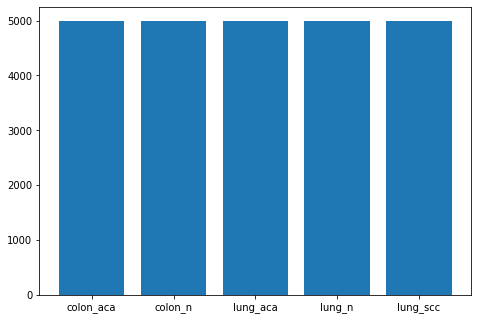

In [35]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['colon_aca','colon_n', 'lung_aca', 'lung_n', 'lung_scc']
count_train = [colon_aca, colon_n, lung_aca, lung_n, lung_scc]
ax.bar(labels, count_train)
plt.show()

In [36]:
train = pd.concat([pd.Series(img_as_jpg,name="image").apply(str),pd.Series(file_count, name="type")],axis=1)
train = train.sample(frac=1).reset_index(drop=True)
print(np.shape(train))

(25000, 2)


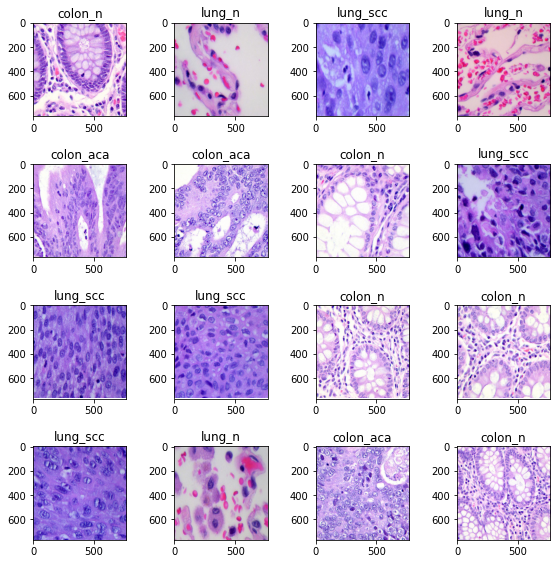

In [37]:
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
fig.tight_layout()
counter = 0
for ax in axes.reshape(-1): 
    ax.imshow(plt.imread(train["image"][counter]))
    ax.set_title(train["type"][counter])
    plt.rcParams["axes.grid"] = False
    counter = counter+1

## 2. Model

In [38]:
hparams = AttrDict(
    image_size=(128, 128, 3),
    n_classes=len(labels),
    batch_size=64,
)

ds = tf.keras.preprocessing.image_dataset_from_directory("lung_colon_image_set", image_size=hparams.image_size[:-1], batch_size=hparams.batch_size)
train_split = round(0.8 * ds.cardinality().numpy()) 
train_ds = ds.take(train_split); train_ds.class_names = ds.class_names
validation_ds = ds.skip(train_split); validation_ds.class_names = ds.class_names

Found 25000 files belonging to 5 classes.


In [39]:
!nvidia-smi

Tue Jul  6 12:39:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 465.19.01    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA Tesla V1...  On   | 00000000:1A:00.0 Off |                    0 |
| N/A   32C    P0    56W / 300W |  30590MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA Tesla V1...  On   | 00000000:1B:00.0 Off |                    0 |
| N/A   

In [ ]:
# ## train_test structure
# hparams = AttrDict(
#     image_size=(128, 128, 3),
#     n_classes=len(labels),
#     batch_size=64,
# )

# train_ds = tf.keras.preprocessing.image_dataset_from_directory("RashData/Train/Train_2_Cases", image_size=hparams.image_size[:-1], batch_size=hparams.batch_size)
# validation_ds = tf.keras.preprocessing.image_dataset_from_directory("RashData/Validation/Validation_2_Cases", image_size=hparams.image_size[:-1], batch_size=hparams.batch_size)

 

In [40]:
train_ds

<TakeDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>

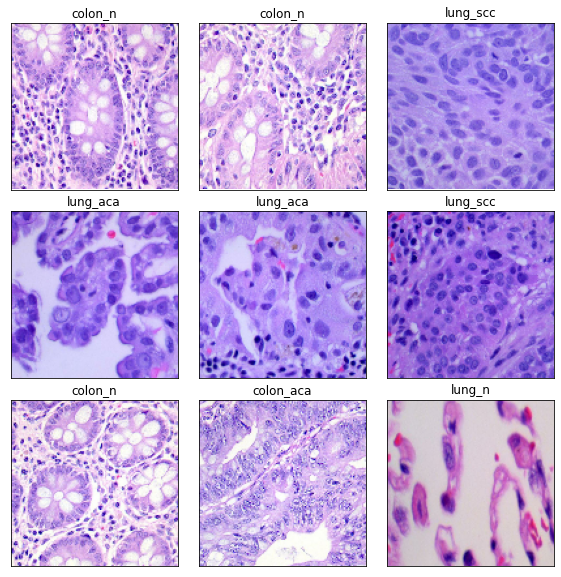

In [41]:
_ = plot_grid_ds(train_ds)

In [42]:
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    model = ViTClassfier(hparams.image_size, hparams.n_classes)
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=["accuracy", BalancedSparseCategoricalAccuracy()]
    )

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3', '/job:localhost/replica:0/task:0/device:GPU:4', '/job:localhost/replica:0/task:0/device:GPU:5', '/job:localhost/replica:0/task:0/device:GPU:6', '/job:localhost/replica:0/task:0/device:GPU:7')
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.a

In [43]:
model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
INFO:tensorflow:batch_all_reduce: 26 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3', '/job:localhost/replica:0/task:0/device:GPU:4', '/job:localhost/replica:0/task:0/device:GPU:5', '/job:localhost/replica:0/task:0/device:GPU:6', '/job:localhost/replica:0/task:0/device:GPU:7').
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:batch_all_reduce: 26 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/devi

In [48]:
model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
313/313 [==============================] - 771s 2s/step - loss: 0.2185 - accuracy: 0.9161 - balanced_sparse_categorical_accuracy: 0.9155 - val_loss: 0.3089 - val_accuracy: 0.8714 - val_balanced_sparse_categorical_accuracy: 0.8675
Epoch 2/10
313/313 [==============================] - 246s 777ms/step - loss: 0.2092 - accuracy: 0.9176 - balanced_sparse_categorical_accuracy: 0.9179 - val_loss: 0.2445 - val_accuracy: 0.8990 - val_balanced_sparse_categorical_accuracy: 0.8955
Epoch 3/10
313/313 [==============================] - 244s 768ms/step - loss: 0.1704 - accuracy: 0.9343 - balanced_sparse_categorical_accuracy: 0.9331 - val_loss: 0.2014 - val_accuracy: 0.9239 - val_balanced_sparse_categorical_accuracy: 0.9228
Epoch 4/10
313/313 [==============================] - 243s 766ms/step - loss: 0.1808 - accuracy: 0.9313 - balanced_sparse_categorical_accuracy: 0.9315 - val_loss: 0.2145 - val_accuracy: 0.9022 - val_balanced_sparse_categorical_accuracy: 0.9011
Epoch 5/10
313/313 [=======

## 3. Results

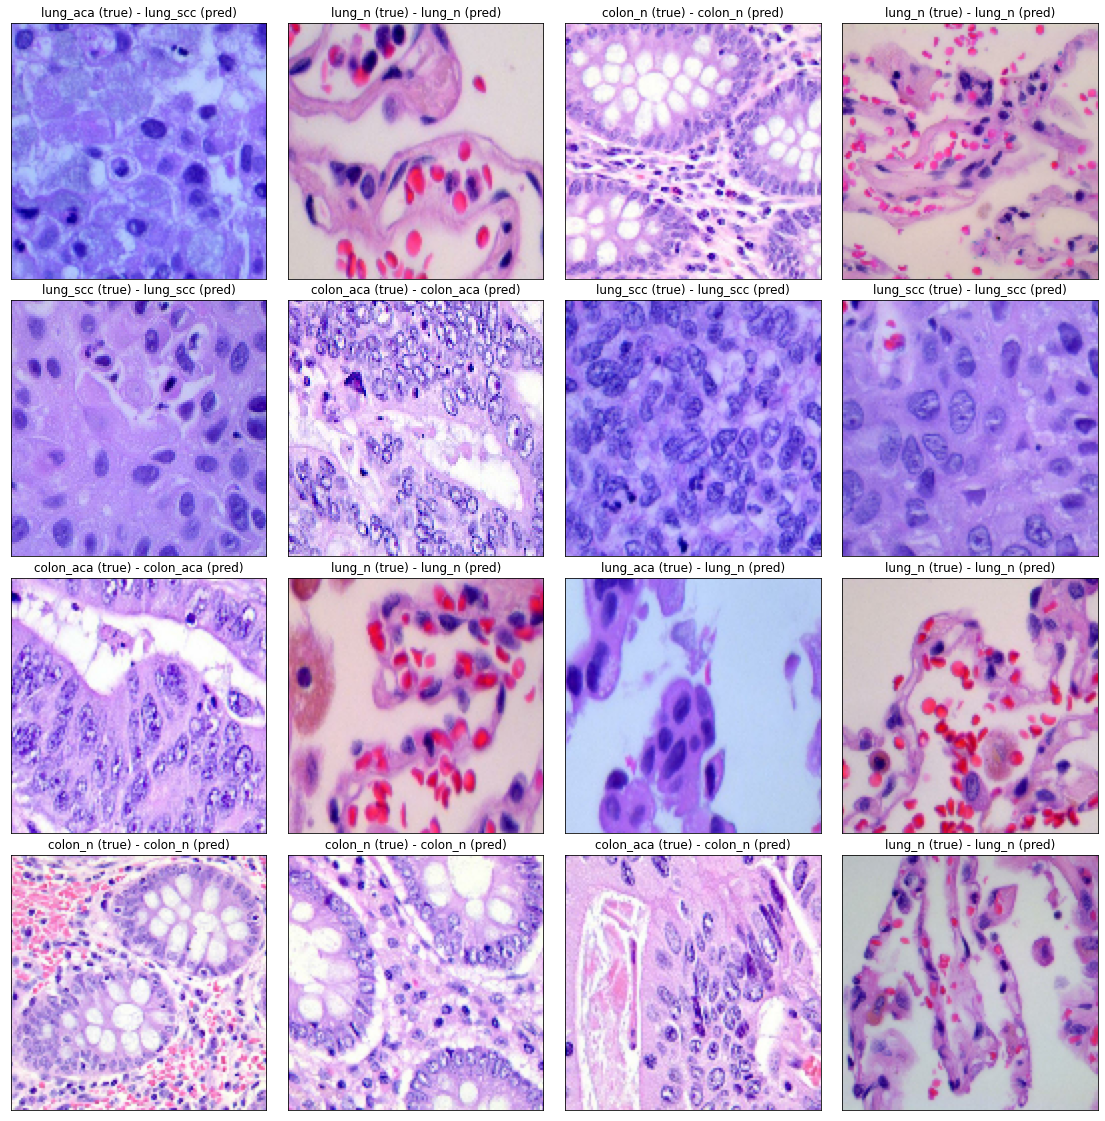

In [44]:
_ = plot_grid_ds(validation_ds, size=(4, 4), model=model, figsize= (20,20))

In [45]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

X, y_true = list(zip(*[(X, y) for (X, y) in validation_ds.unbatch().as_numpy_iterator()]))
y_hat = model.predict_on_batch(np.array(X)).argmax(axis=-1)
mat = confusion_matrix(y_true, y_hat)
mat

array([[804, 157,   2,   2,   0],
       [ 69, 906,   0,   5,   0],
       [  5,   9, 880,   6, 117],
       [  0,   6,  15, 990,   0],
       [  0,   0, 106,   0, 889]])

In [46]:
from sklearn.metrics import balanced_accuracy_score

acc = balanced_accuracy_score(y_true, y_hat)
print(f"Final accuracy on validation set : {acc:.3f}")

Final accuracy on validation set : 0.899


In [47]:
model.save("models/ViT_on_10_epochs.model")

INFO:tensorflow:Assets written to: models/ViT_on_10_epochs.model/assets


INFO:tensorflow:Assets written to: models/ViT_on_10_epochs.model/assets
